In [1]:
#STEP1:IMPORTING LIBRARIES

import pandas as pd  # For data manipulation
import numpy as np   # For mathematical operations
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns  # For beautiful statistical plots
import warnings
warnings.filterwarnings('ignore')

#Machine Learning libraries
from sklearn.model_selection import train_test_split  #Split data into train/test
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Prepare data for ML
from sklearn.ensemble import RandomForestClassifier  #ML Algorithm 1
from sklearn.linear_model import LogisticRegression  #ML Algorithm 2
from sklearn.svm import SVC  #ML Algorithm 3
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib  #To save trained model

print("✅All libraries imported successfully!")
print("🎯Project: Employee Salary Prediction using Machine Learning")
print("📊Dataset: Adult Census Income Dataset")

✅All libraries imported successfully!
🎯Project: Employee Salary Prediction using Machine Learning
📊Dataset: Adult Census Income Dataset


In [2]:
#STEP2:LOADING AND EXPLORING DATA

print("\n" + "="*50)
print("STEP 2: LOADING DATA")
print("="*50)

data_path = r"C:\Users\chinm\OneDrive\Desktop\IBM SkillBuild Internship\salary_prediction_project\adult 3.csv"
df = pd.read_csv(data_path)

print(f"📈Dataset loaded successfully!")
print(f"📊Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")

#Displaying first few rows
print("\n🔍First 5 rows of our data:")
print(df.head())

#Checking data types and missing values
print("\n📋Dataset Information:")
print(df.info())

#Checking for missing values
print(f"\n❓Missing values in each column:")
print(df.isnull().sum())

#Looking at target variable
print(f"\n🎯Target variable distribution:")
print(df['income'].value_counts())
print(f"\nPercentage breakdown:")
print(df['income'].value_counts(normalize=True) * 100)


STEP 2: LOADING DATA
📈Dataset loaded successfully!
📊Dataset shape: 48842 rows × 15 columns

🔍First 5 rows of our data:
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   


STEP 3: DATA EXPLORATION & VISUALIZATION


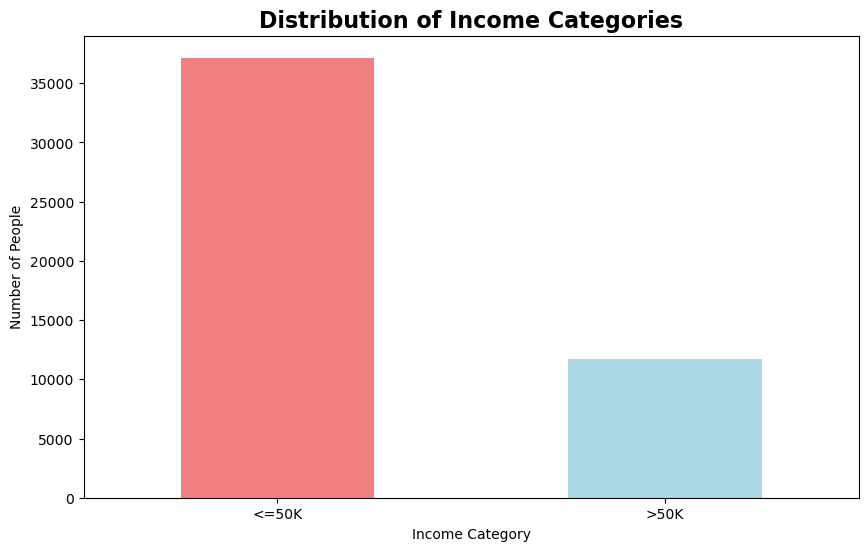

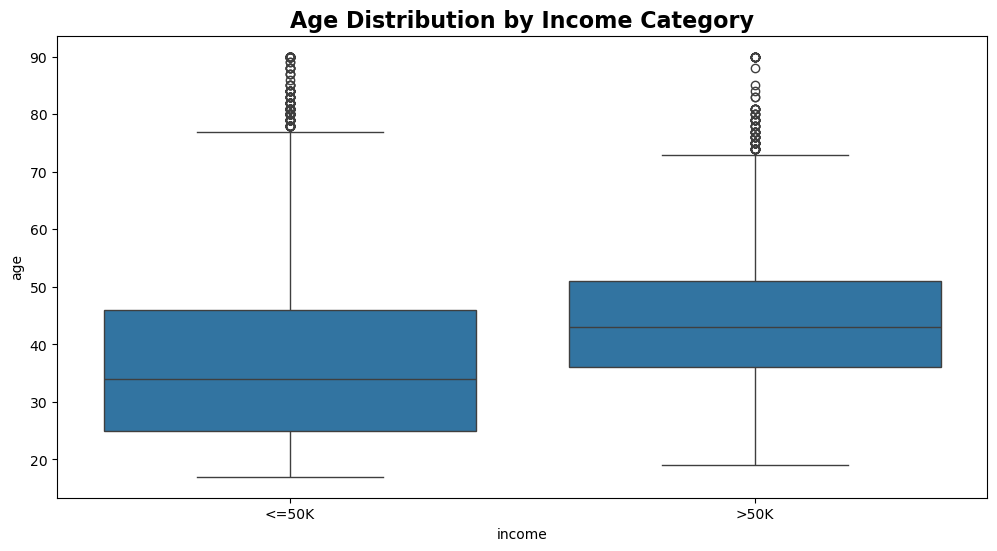

<Figure size 1400x800 with 0 Axes>

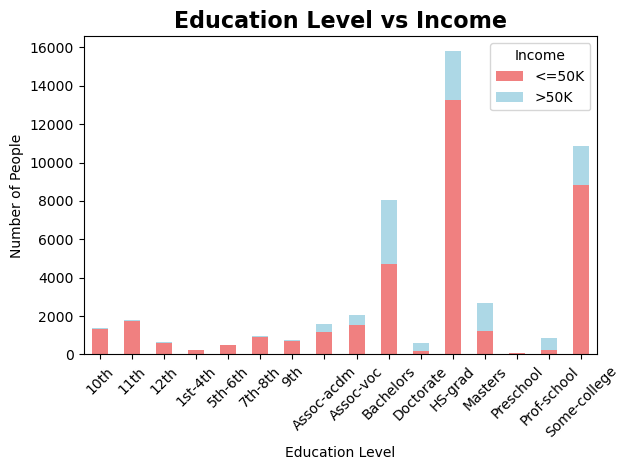

<Figure size 1000x600 with 0 Axes>

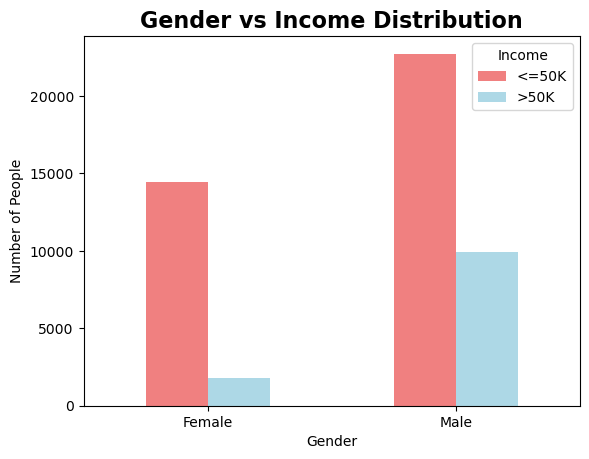

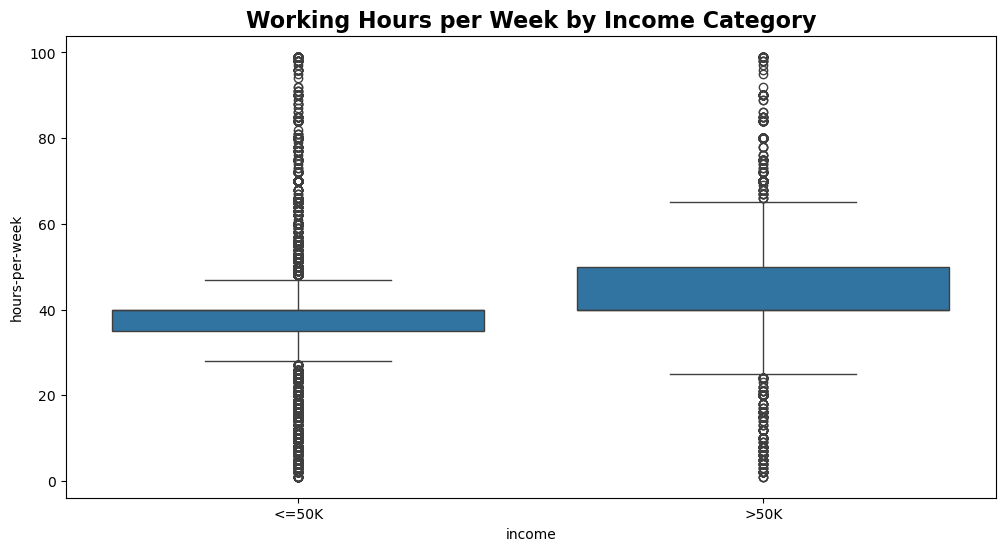

📊Data exploration complete!


In [3]:
#STEP3:DATA VISUALIZATION AND EXPLORATION

print("\n" + "="*50)
print("STEP 3: DATA EXPLORATION & VISUALIZATION")
print("="*50)

#Setting up the plotting style
plt.style.use('default')
fig_size = (12, 8)

#1.Income distribution
plt.figure(figsize=(10, 6))
df['income'].value_counts().plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Distribution of Income Categories', fontsize=16, fontweight='bold')
plt.xlabel('Income Category')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.show()

#2.Age distribution by income
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='income', y='age')
plt.title('Age Distribution by Income Category', fontsize=16, fontweight='bold')
plt.show()

#3.Education level impact
plt.figure(figsize=(14, 8))
education_income = pd.crosstab(df['education'], df['income'])
education_income.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'])
plt.title('Education Level vs Income', fontsize=16, fontweight='bold')
plt.xlabel('Education Level')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.tight_layout()
plt.show()

#4.Gender and income
plt.figure(figsize=(10, 6))
gender_income = pd.crosstab(df['gender'], df['income'])
gender_income.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Gender vs Income Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.legend(title='Income')
plt.show()

#5.Work hours analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='income', y='hours-per-week')
plt.title('Working Hours per Week by Income Category', fontsize=16, fontweight='bold')
plt.show()

print("📊Data exploration complete!")

In [4]:
#STEP4:DATA PREPROCESSING

print("\n" + "="*50)
print("STEP 4: PREPARING DATA FOR MACHINE LEARNING")
print("="*50)

#Creating a copy of the dataset for preprocessing
df_processed = df.copy()

print("🔧Converting categorical variables to numerical...")

#List of categorical columns
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                      'relationship', 'race', 'gender', 'native-country']

#Initializing label encoders
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    df_processed[column] = le.fit_transform(df_processed[column].astype(str))
    label_encoders[column] = le
    print(f"✅Encoded {column}")

#Encoding target variable
target_encoder = LabelEncoder()
df_processed['income'] = target_encoder.fit_transform(df_processed['income'])

print(f"🎯Target encoding: <=50K -> {target_encoder.transform(['<=50K'])[0]}, >50K -> {target_encoder.transform(['>50K'])[0]}")

#Separating features (X) and target (y)
X = df_processed.drop('income', axis=1)  # All columns except 'income'
y = df_processed['income']  # Only the 'income' column

print(f"📊Features shape: {X.shape}")
print(f"🎯Target shape: {y.shape}")

#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n📚Training set: {X_train.shape[0]} samples")
print(f"🧪Testing set: {X_test.shape[0]} samples")

#Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅Data preprocessing complete!")


STEP 4: PREPARING DATA FOR MACHINE LEARNING
🔧Converting categorical variables to numerical...
✅Encoded workclass
✅Encoded education
✅Encoded marital-status
✅Encoded occupation
✅Encoded relationship
✅Encoded race
✅Encoded gender
✅Encoded native-country
🎯Target encoding: <=50K -> 0, >50K -> 1
📊Features shape: (48842, 14)
🎯Target shape: (48842,)

📚Training set: 39073 samples
🧪Testing set: 9769 samples
✅Data preprocessing complete!


In [5]:
#STEP5:MACHINE LEARNING MODEL TRAINING

print("\n" + "="*50)
print("STEP 5: TRAINING MACHINE LEARNING MODELS")
print("="*50)

#Training 3 different algorithms and compare them
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

#Dictionary to store results
results = {}

print("🤖Training multiple ML algorithms...")
print("-" * 50)

for name, model in models.items():
    print(f"\n🔄Training {name}...")
    
    #Training the model
    if name == 'Support Vector Machine':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    #Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred
    }
    
    print(f"✅{name} Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

#Finding the best model
best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
best_accuracy = results[best_model_name]['accuracy']

print(f"\n🏆BEST MODEL: {best_model_name}")
print(f"🎯Best Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")


STEP 5: TRAINING MACHINE LEARNING MODELS
🤖Training multiple ML algorithms...
--------------------------------------------------

🔄Training Logistic Regression...
✅Logistic Regression Accuracy: 0.7875 (78.75%)

🔄Training Random Forest...
✅Random Forest Accuracy: 0.8613 (86.13%)

🔄Training Support Vector Machine...
✅Support Vector Machine Accuracy: 0.8535 (85.35%)

🏆BEST MODEL: Random Forest
🎯Best Accuracy: 0.8613 (86.13%)



STEP 6: DETAILED MODEL EVALUATION
📊Detailed evaluation for Random Forest:

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      7431
        >50K       0.75      0.62      0.68      2338

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



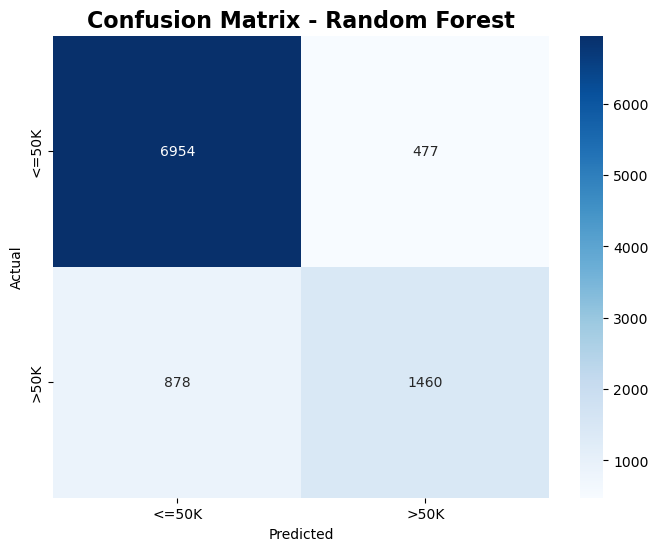

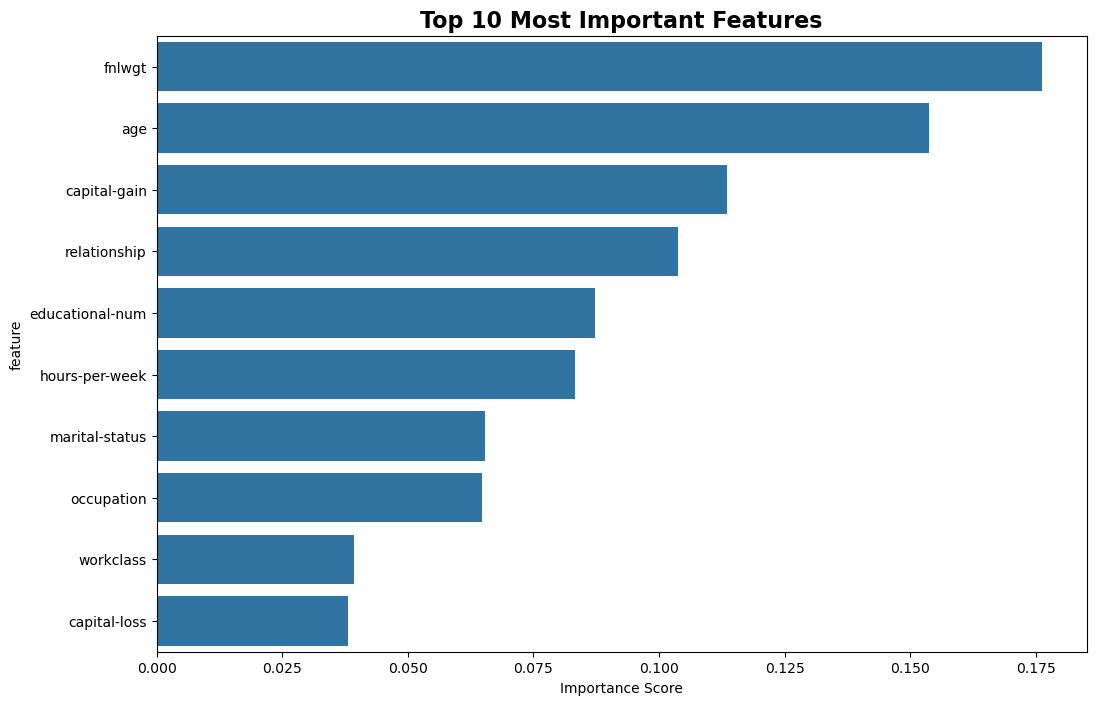

🔍Top 5 most important features:
  fnlwgt: 0.1763
  age: 0.1537
  capital-gain: 0.1136
  relationship: 0.1037
  educational-num: 0.0872


In [6]:
#STEP6:MODEL EVALUATION

print("\n" + "="*50)
print("STEP 6: DETAILED MODEL EVALUATION")
print("="*50)

#Detailed evaluation of the best model
y_pred_best = results[best_model_name]['predictions']

print(f"📊Detailed evaluation for {best_model_name}:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, 
                          target_names=['<=50K', '>50K']))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['<=50K', '>50K'], 
            yticklabels=['<=50K', '>50K'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=16, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Feature importance
if best_model_name == 'Random Forest':
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title('Top 10 Most Important Features', fontsize=16, fontweight='bold')
    plt.xlabel('Importance Score')
    plt.show()
    
    print("🔍Top 5 most important features:")
    for idx, row in feature_importance.head().iterrows():
        print(f"  {row['feature']}: {row['importance']:.4f}")

In [7]:
#STEP7:SAVING THE MODEL

print("\n" + "="*50)
print("STEP 7: SAVING THE TRAINED MODEL")
print("="*50)

#Saving the best model and preprocessing objects
model_data = {
    'model': best_model,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'target_encoder': target_encoder,
    'feature_names': list(X.columns),
    'model_name': best_model_name,
    'accuracy': best_accuracy
}

#Saving to file
joblib.dump(model_data, 'salary_prediction_model.pkl')
print("✅Model saved as 'salary_prediction_model.pkl'")


STEP 7: SAVING THE TRAINED MODEL
✅Model saved as 'salary_prediction_model.pkl'


In [8]:
#STEP8:MAKING PREDICTIONS ON NEW DATA

print("\n" + "="*50)
print("STEP 8: TESTING WITH NEW DATA")
print("="*50)

#Function to make predictions on new data
def predict_salary(age, workclass, education, marital_status, occupation, 
                  relationship, race, gender, capital_gain, capital_loss, 
                  hours_per_week, native_country, fnlwgt=0, educational_num=0):
    """
    Predict salary category for a new person
    """
    #Creating a DataFrame with the input
    new_data = pd.DataFrame({
        'age': [age],
        'workclass': [workclass],
        'fnlwgt': [fnlwgt],  
        'education': [education],
        'educational-num': [educational_num],  
        'marital-status': [marital_status],
        'occupation': [occupation],
        'relationship': [relationship],
        'race': [race],
        'gender': [gender],
        'capital-gain': [capital_gain],
        'capital-loss': [capital_loss],
        'hours-per-week': [hours_per_week],
        'native-country': [native_country]
    })
    
    #Applying the same preprocessing
    for column in categorical_columns:
        if column in new_data.columns:
            #Handling unknown categories
            try:
                new_data[column] = label_encoders[column].transform(new_data[column].astype(str))
            except ValueError:
                new_data[column] = 0
    
    #Making prediction
    if best_model_name == 'Support Vector Machine':
        new_data_scaled = scaler.transform(new_data)
        prediction = best_model.predict(new_data_scaled)[0]
        probability = best_model.predict_proba(new_data_scaled)[0] if hasattr(best_model, 'predict_proba') else [0.5, 0.5]
    else:
        prediction = best_model.predict(new_data)[0]
        probability = best_model.predict_proba(new_data)[0] if hasattr(best_model, 'predict_proba') else [0.5, 0.5]
    
    #Converting back to original labels
    predicted_income = target_encoder.inverse_transform([prediction])[0]
    
    return predicted_income, probability

#Testing with example data
print("🧪Testing with example data:")
print("Person: 30-year-old, married, college graduate, works full-time in tech")

example_prediction, example_prob = predict_salary(
    age=35,
    workclass='Private',
    education='Bachelors',
    marital_status='Married-civ-spouse',
    occupation='Tech-support',
    relationship='Husband',
    race='White',
    gender='Male',
    capital_gain=0,
    capital_loss=0,
    hours_per_week=40,
    native_country='United-States'
)

print(f"📊Prediction: {example_prediction}")
print(f"📈Confidence: {max(example_prob)*100:.1f}%")


STEP 8: TESTING WITH NEW DATA
🧪Testing with example data:
Person: 30-year-old, married, college graduate, works full-time in tech
📊Prediction: <=50K
📈Confidence: 77.0%


In [9]:
#PROJECT SUMMARY

print("\n" + "="*60)
print("🎉PROJECT COMPLETE! SUMMARY:")
print("="*60)
print(f"✅Dataset: {df.shape[0]} records analyzed")
print(f"✅Best Model: {best_model_name}")
print(f"✅Model Accuracy: {best_accuracy*100:.2f}%")
print(f"✅Model saved as: salary_prediction_model.pkl")

#Final model information
print(f"\n📋Model Details:")
print(f"   • Algorithm: {best_model_name}")
print(f"   • Features used: {len(X.columns)} variables")
print(f"   • Training samples: {len(X_train)}")
print(f"   • Test samples: {len(X_test)}")
print(f"   • Accuracy on test set: {best_accuracy:.4f}")

print("\n🎯Ready for Streamlit app development!")


🎉PROJECT COMPLETE! SUMMARY:
✅Dataset: 48842 records analyzed
✅Best Model: Random Forest
✅Model Accuracy: 86.13%
✅Model saved as: salary_prediction_model.pkl

📋Model Details:
   • Algorithm: Random Forest
   • Features used: 14 variables
   • Training samples: 39073
   • Test samples: 9769
   • Accuracy on test set: 0.8613

🎯Ready for Streamlit app development!
